In [9]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [134]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os.path as osp
import glob
import json
import cv2
import torch

%matplotlib inline

In [133]:
datapath = "./input"
image_path = osp.join(datapath, "train_images")
annotation_path = osp.join(datapath, "train_annotations")

label_dict = {
    "LDK": 0, "廊下": 1, "浴室": 2, "洋室": 3,  # polygon
    "引戸": 4, "折戸": 5, "開戸": 6  # box
}

poly = [0,1,2,3]
box = [4,5,6]

alpha = 0.5

In [29]:
image_path_list = glob.glob(image_path+"/*.png")
annotation_path_list = glob.glob(annotation_path+"/*.json")

print(len(image_path_list),len(annotation_path_list))


2258 2258


In [28]:
image_path_list[:10]

['./input\\train_images\\train_0000.png',
 './input\\train_images\\train_0001.png',
 './input\\train_images\\train_0002.png',
 './input\\train_images\\train_0003.png',
 './input\\train_images\\train_0004.png',
 './input\\train_images\\train_0005.png',
 './input\\train_images\\train_0006.png',
 './input\\train_images\\train_0007.png',
 './input\\train_images\\train_0008.png',
 './input\\train_images\\train_0009.png']

In [34]:
image_sample = cv2.imread(image_path_list[0])
print(image_sample.shape)

(621, 579, 3)


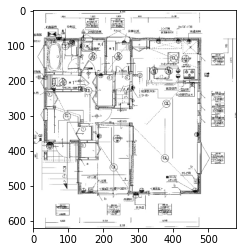

In [31]:
plt.imshow(image_sample)

In [131]:
w_max = 0
h_max = 0
w_min = 100000
h_min = 100000
for image_file_path in image_path_list:
    image = cv2.imread(image_file_path)
    image_h, image_w, n_channel = image.shape
    w_max, h_max = max(w_max, image_w), max(h_max, image_h)
    w_min, h_min = min(w_min, image_w), min(h_min, image_h)


In [132]:
print(w_max,w_min,h_max,h_min)

3119 111 2820 90
0 2258


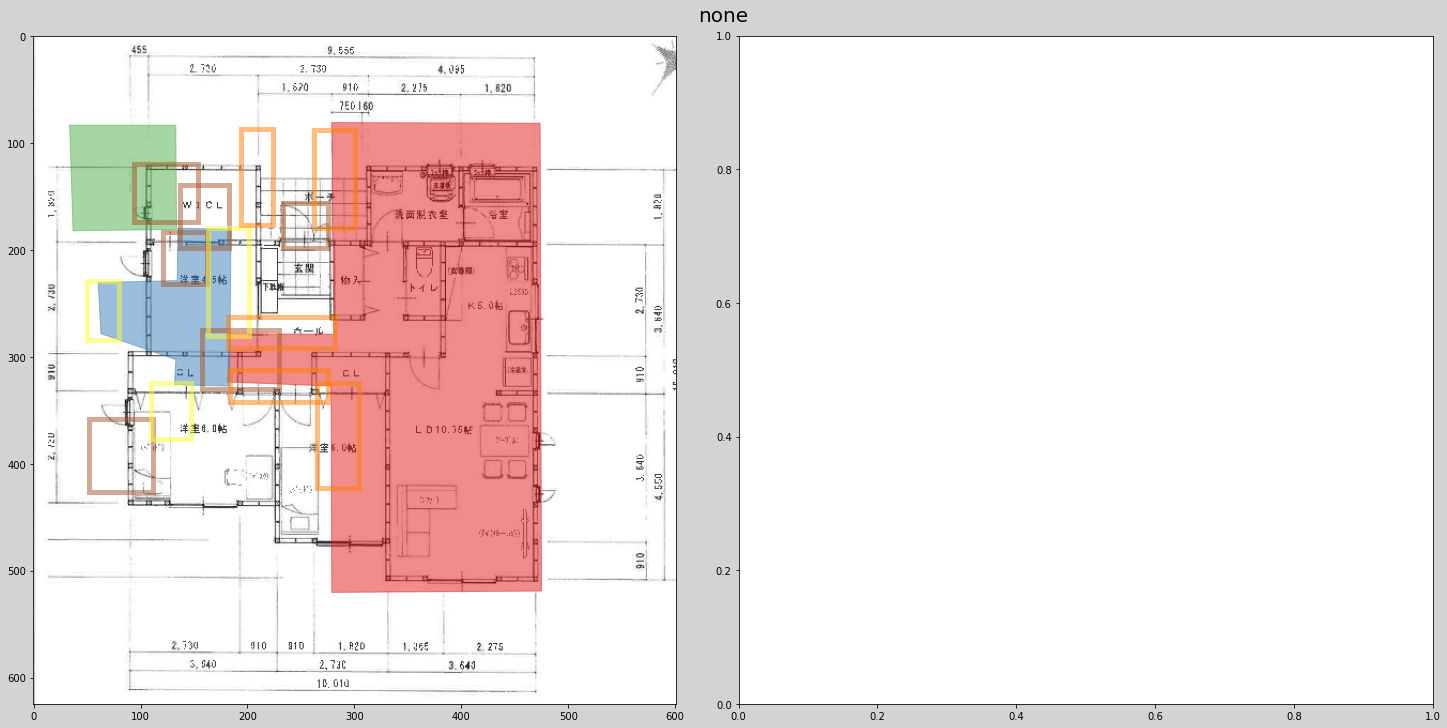

In [136]:
n_sample = 20

cmap = plt.get_cmap("Set1")
ncol = 2
nrow = (n_sample + 1) // ncol
fig, axes = plt.subplots(nrow, ncol, figsize=(10*ncol, 10*nrow), constrained_layout=True, facecolor="lightgray")
fig.suptitle("none", fontsize=20)
axes = axes.flatten()
ax = axes[0]

image_sample = cv2.imread(image_path_list[0])
f = open(annotation_path_list[0],'r',encoding="utf-8")
annotation_sample = json.load(f)
annotation_sample = annotation_sample["labels"]

ax.imshow(image, cmap="gray", vmin=0,vmax=255)
# ax.grid(False)
for label in annotation_sample:
    for pos in annotation_sample[label]:
        label_code = label_dict[label]
        pos_array = np.array(pos)
        if label_code in poly:
            ax.fill(pos_array[:, 0], pos_array[:,1],alpha=alpha, c=cmap.colors[label_code])
        else:
            x1, y1, x2, y2 = pos_array
            w = x2 - x1
            h = y2 - y1
            box = mpl.patches.Rectangle((x1,y1), w, h, alpha=alpha, color=cmap.colors[label_code], fill=False, lw=5)
            ax.add_patch(box)


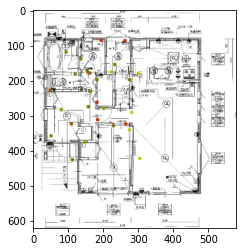

In [123]:
plt.imshow(image_sample)